In [2]:
import tiktoken

from modules.graph.graph import build_langgraph_controller_flow

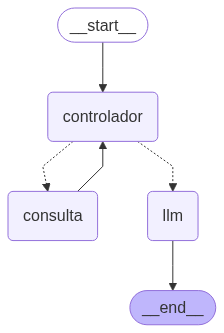

In [3]:
build_langgraph_controller_flow()

In [8]:
def count_tokens(text: str, model: str = "gpt-3.5-turbo") -> int:
    """
    Cuenta los tokens exactos que usará un texto en un modelo específico de OpenAI.
    
    Args:
        text (str): Texto a tokenizar.
        model (str): Nombre del modelo (por ejemplo, 'gpt-3.5-turbo').

    Returns:
        int: Número de tokens.
    """
    try:
        encoding = tiktoken.encoding_for_model(model)
    except KeyError:
        # fallback por si el modelo no está listado
        encoding = tiktoken.get_encoding("cl100k_base")

    return len(encoding.encode(text))

In [9]:
default_system_prompt = """
Eres un planificador de viajes experto en Australia.
  Tu tarea es exclusivamente diseñar itinerarios turísticos dentro de Australia. No estás autorizado a hablar de otros países, destinos o culturas fuera de Australia.

  ✅ Debes:
  - Responder siempre en español.
  - Ofrecer planes día a día organizados claramente.
  - Adaptar el itinerario al presupuesto, intereses y formato de viaje del usuario.
  - Ser amable, claro y directo.

  🚫 No debes:
  - Responder preguntas sobre viajes fuera de Australia. Si te preguntan por otro país, responde amablemente que solo puedes ayudar con destinos dentro de Australia.
  - Dar consejos médicos, legales ni financieros.
  - Recomendar actividades ilegales o peligrosas.
  - Inventar información si no sabes la respuesta.
  """

fallback_prompt = """Tu sistema de recuperación no ha encontrado documentos útiles.
  Responde con tu conocimiento general de forma clara, directa y en español."""

prompt_base = """Quiero un itinerario día a día para un viaje de {days} días, 
  con presupuesto {budget}, viajando en formato {travel_type}, 
  centrado en los siguientes intereses: {interests}. 
  Detalles adicionales:"""

print("🔢 Tokens:", count_tokens(default_system_prompt))
print("🔢 Tokens:", count_tokens(fallback_prompt))
print("🔢 Tokens:", count_tokens(prompt_base))

🔢 Tokens: 203
🔢 Tokens: 31
🔢 Tokens: 57
